In [1]:
import pandas as pd, geopandas as gpd
import time, calendar

In [2]:
def count_fatalities_in_shapefile(filename, fatalities):
    polys = gpd.read_file(f"../shp/{filename}.shp")
    geojson_path = fatalities
    with open(geojson_path, encoding = "utf-8-sig") as geojson_file:
        points = gpd.read_file(geojson_file, driver ="GeoJSON")
        print(len(points))
    pointsInPolygon = gpd.sjoin(points, polys, how="right")
    pointsInPolygon['count']=1
    fatalities_per_region = pointsInPolygon.groupby('name_en').agg({'geometry':'first', 'count':'sum'}).reset_index()
    fatalities_per_region.set_geometry("geometry", crs = "EPSG:4326", inplace = True)
    fatalities_per_region.plot(column="count", figsize=(40,10))
    fatalities_per_region.sort_values(by="count" , ascending = False).head()
    timestamp = calendar.timegm(time.gmtime())

    fatalities_per_region_fn = f"../geolocated_datasets/{timestamp}-{filename}.json"
    output_file = open(fatalities_per_region_fn, "w", encoding="utf-8-sig")
    contents = fatalities_per_region.to_json()
    output_file.write(contents)

13173


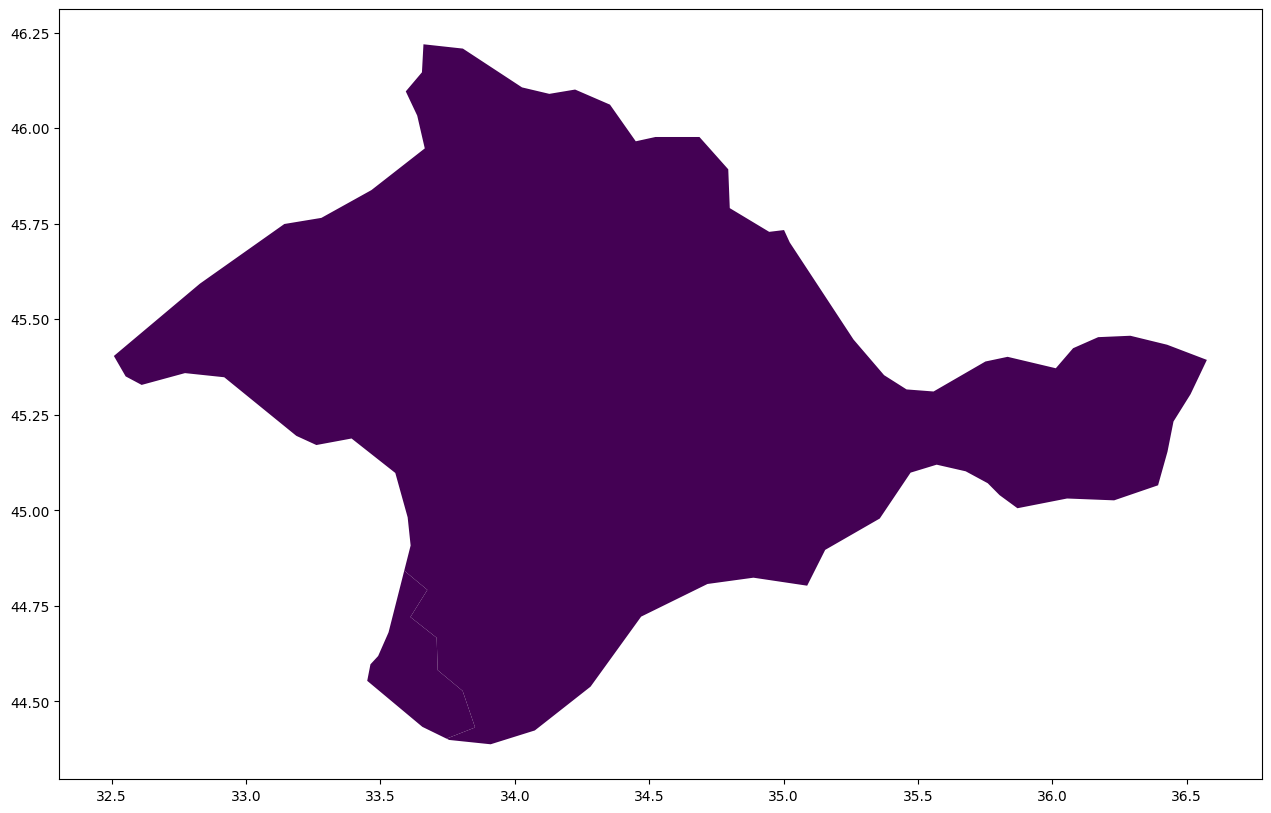

In [3]:
fatalities = "../geolocated_datasets/1686574174R-geolocated-@poisk_in_ua.json"
filename = "Crimea"
count_fatalities_in_shapefile(filename, fatalities)

13173


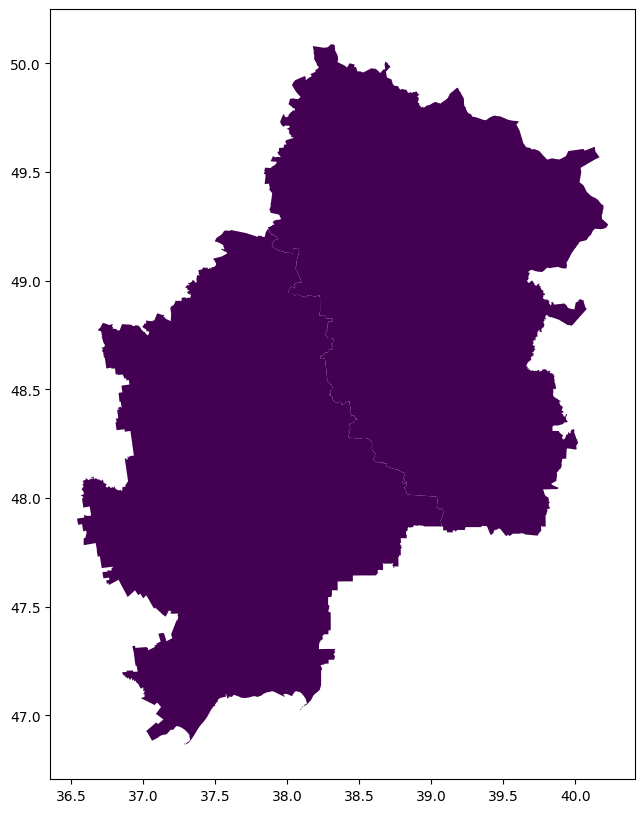

In [4]:
filename = "Donbas"
count_fatalities_in_shapefile(filename, fatalities)